# 1. &nbsp; Biochemical reaction kinetics
This notebook contains numerical and analytical solutions covering different orders of reaction kinetics.

In [8]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(2, 2)

# GENERAL PARAMETERS
t_span = [0, 10]  # time span
t_eval = np.linspace(*t_span, 100)  # time points for plotting

In [ ]:
x0 = [0]  # initial concentration

k_prod = 1  # production rate
p = [k_prod]  # parameters

def dydt_0(t, x, k_prod):  # 0th order reaction
    dydt = np.array([k_prod])
    return dydt

results = solve_ivp(dydt_0, t_span, x0, t_eval=t_eval, args=p)  # solve the IVP
exact = x0 + k_prod * results.t  # analytical solution

ax = fig.add_subplot(gs[0, 0])  # compare the solutions
ax.plot(results.t, np.column_stack(results.y), label="Numerical solution")
ax.plot(results.t, exact, linestyle="dashed", label="Analytical solution")
ax.set_title("0th order reaction")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

In [ ]:
x0 = [1]  # initial concentration

k_deg = 1  # degradation rate
p = [k_deg]  # parameters

def dydt_1a(t, x, k_deg):  # 1st order degradation reaction
    dydt = np.array([
        -k_deg * x
        ])
    return dydt

results = solve_ivp(dydt_1a, t_span, x0, t_eval=t_eval, args=p)  # solve the IVP
exact = x0 * np.exp(-k_deg * results.t)  # analytical solution

ax = fig.add_subplot(gs[1, 0])  # compare the solutions
ax.plot(results.t, np.column_stack(results.y), label="Numerical solution")
ax.plot(results.t, exact, linestyle="dashed", label="Analytical solution")
ax.set_title("1st order degradation reaction")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

In [ ]:
x0 = [1]  # initial concentration

k_prod = 1  # production rate
k_deg = 2  # degradation rate
p = [k_prod, k_deg]  # parameters

def dydt_1b(t, x, k_prod, k_deg):  # 1st order production and degradation reaction
    dydt = np.array([
        k_prod - k_deg * x
        ])
    return dydt

results = solve_ivp(dydt_1b, t_span, x0, t_eval=t_eval, args=p)  # solve the IVP
exact = x0 * np.exp(-k_deg * results.t) + k_prod/k_deg * (1 - np.exp(-k_deg * results.t))  # analytical solution

ax = fig.add_subplot(gs[0, 1])  # compare the solutions
ax.plot(results.t, np.column_stack(results.y), label="Numerical solution")
ax.plot(results.t, exact, linestyle="dashed", label="Analytical solution")
ax.set_title("1st order shuttling between compartments")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

In [ ]:
x_t = 1  # final concentration of X
y_t = 1  # final concentration of Y
xy = 0  # initial concentration of XY
k_on = 1  # dimerization rate
p = [k_on, x_t, y_t]

def dydt_2(t, xy, k_on, x_t, y_t):  # 1st order production and degradation reaction
    dydt = np.array([k_on * (x_t - xy) * (y_t - xy)])
    return dydt

results = solve_ivp(dydt_2, t_span, [xy], t_eval=t_eval, args=p)  # solve the IVP

ax = fig.add_subplot(gs[1, 1])  # compare the solutions
ax.plot(results.t, *results.y, label="Numerical solution")
ax.set_title("2nd order dimerization reaction")
ax.set_xlabel("Time $t$")
ax.set_ylabel("Concentration $x$")
ax.legend()

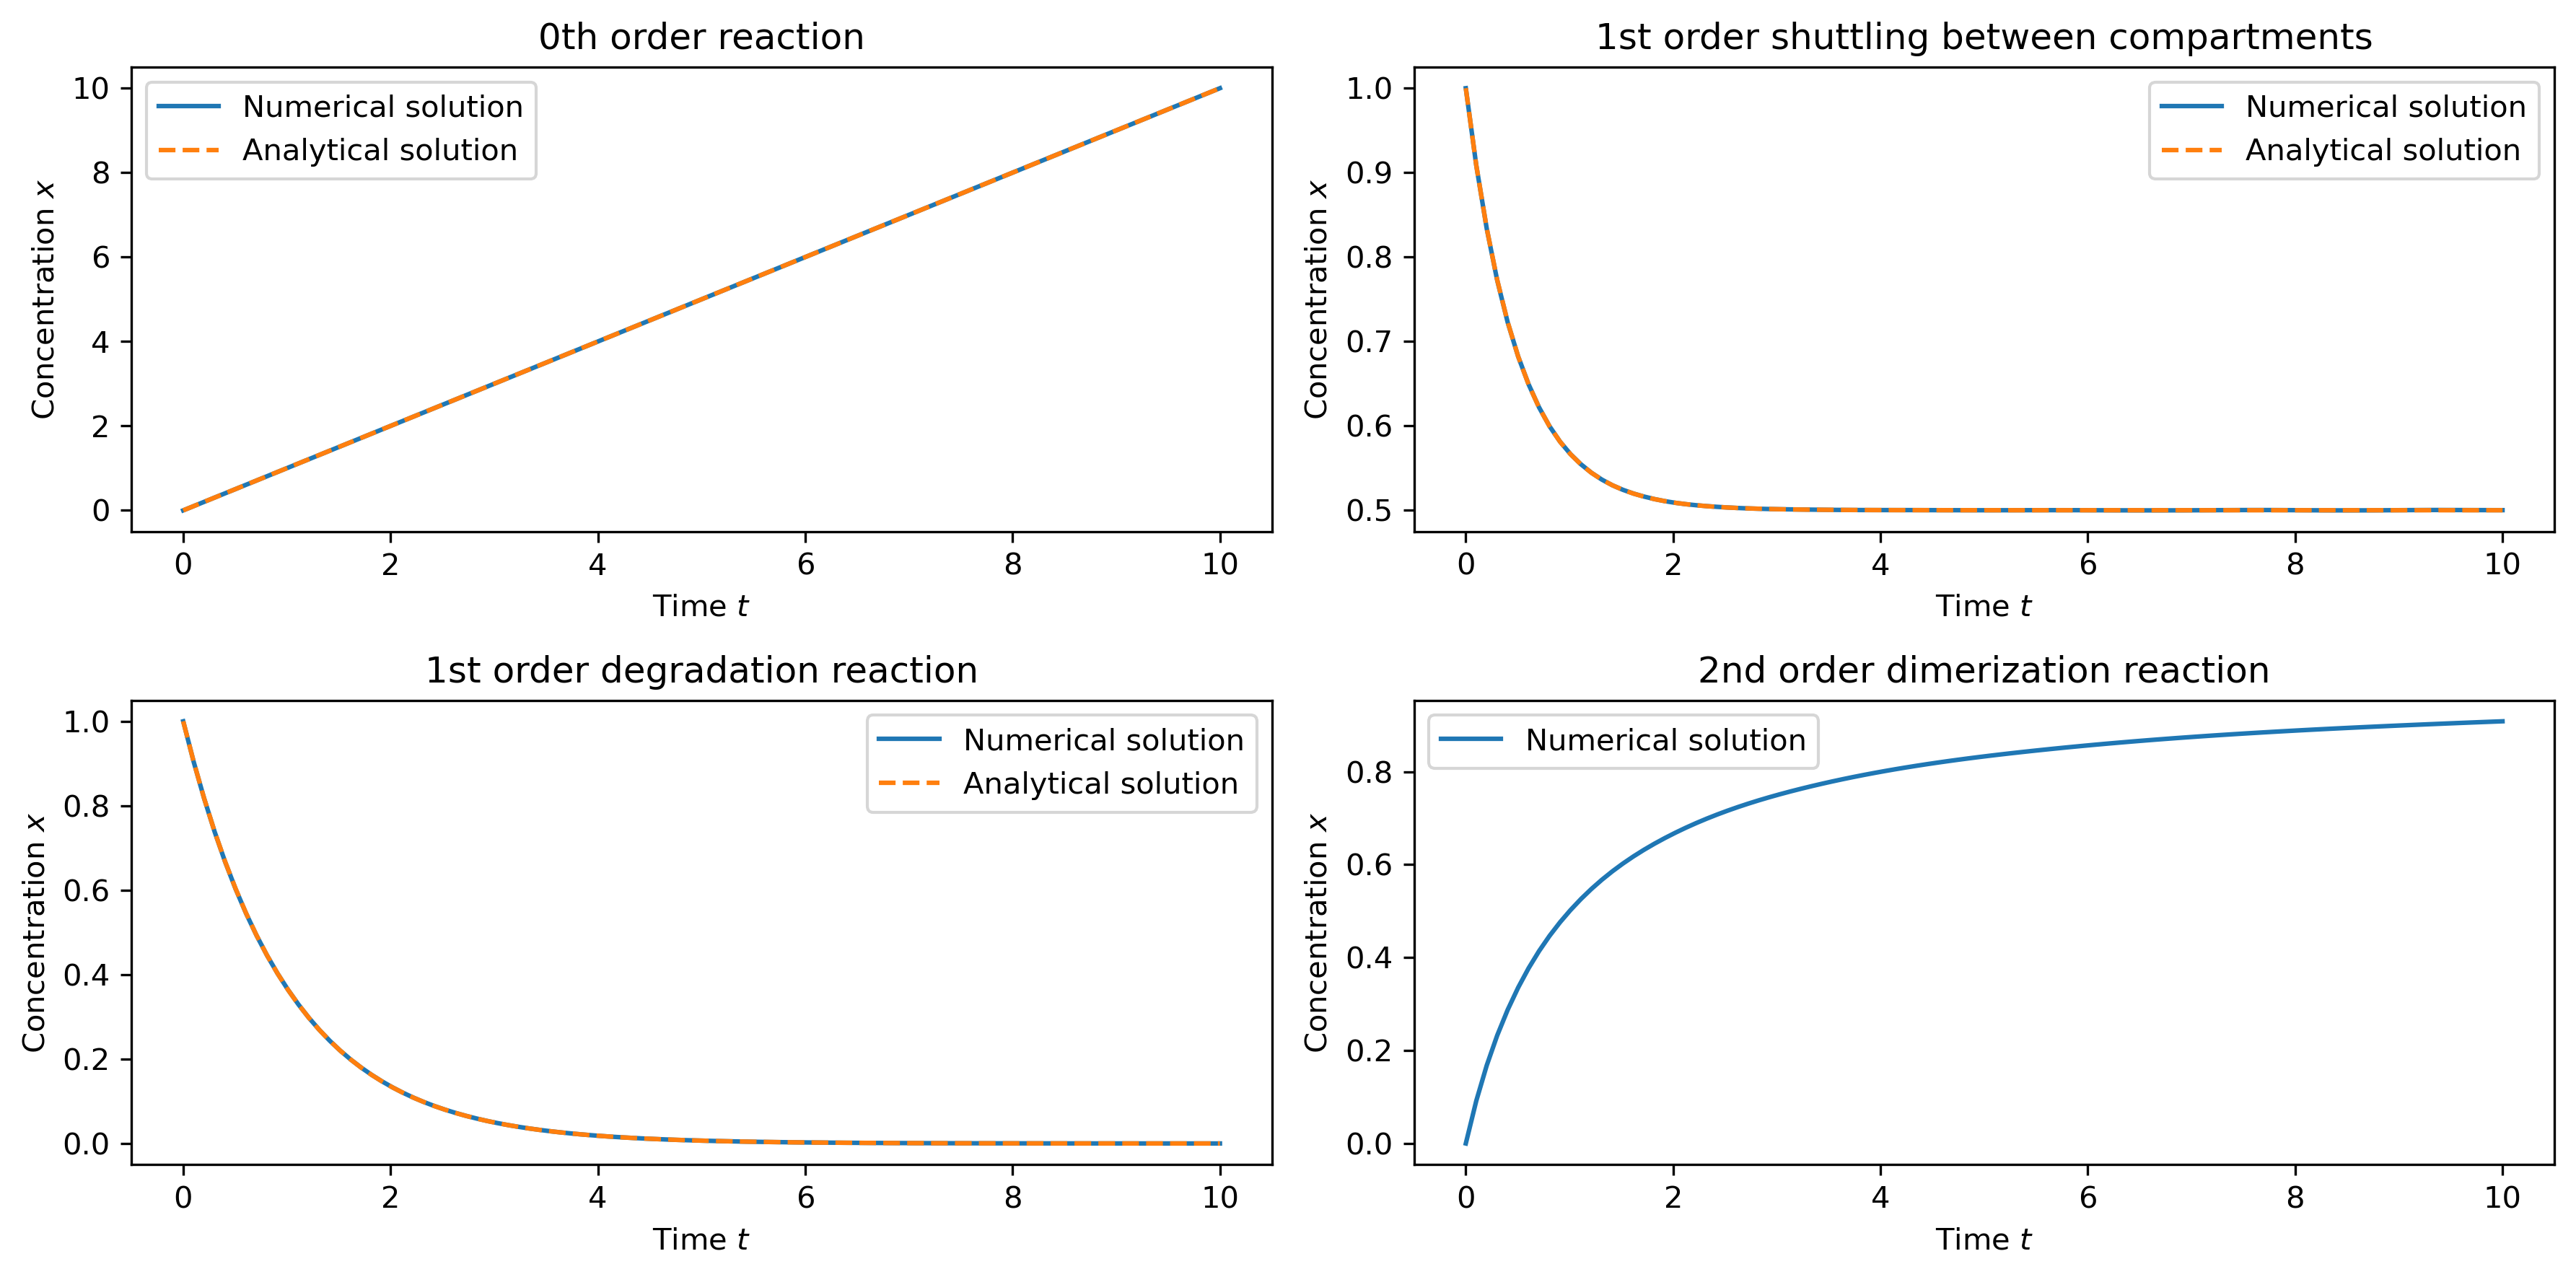

In [14]:
# PLOT THE FIGURE
fig.tight_layout()
fig